# Lesson 1 project: Finding Higgs decays

## Physics background

The particle-search problem may be familiar to some of you—this background section is provided in case it isn't. If you know about this stuff already, you can skip to the next section.

The general problem is that most of the particles we want to study are invisible to our instruments, but if we can observe the particles they decay into, we can reconstruct the original particles.

For example, ${K^0}_S$ is a particle with no charge and a relatively short lifetime. It decays after $10^{-10}$ seconds, which is about 3 centimeters of flight close to the speed of light. Uncharged particles do not leave traces in tracking detectors, which work by collecting ionized gas from charged particles. Fortunately, ${K^0}_S$ often decays into two charged particles, $\pi^+$ and $\pi^-$. In a tracking detector, the $\pi^+$ and $\pi^-$ seem to come out of nowhere.

On the left, we see a ${K^0}_S \to \pi^+ \pi^-$ in a bubble chamber (1960's), and on the right, we see the same decay in the CMS silicon tracker (2010's). In both cases, the vertex where the ${K^0}_S$ was created is also visible.

<center>
<img src="img/kshort-1.png" style="height: 400px; margin-right: 20px"><img src="img/kshort-2.png" style="height: 400px">
</center>

In a tracking detector, we can fully measure the momentum of charged particles, and since energy and momentum are conserved in decays, we know that the sum of energy and momentum of the decay products ($\pi^+$ and $\pi^-$) are the energy and momentum of the particle that decayed (${K^0}_S$). Using

$$p = \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2}$$

$$m = \sqrt{E^2 - p^2}$$

we can reconstruct the mass $m$ of the particle that decayed.

The problem is identifying which two tracks are the decay products of the specific particle we're interested in. A collision event produces many particles and many tracks.

<center>
<img src="img/090324_ALICE-hirez.jpg" style="height: 400px">
</center>

Luckily, for most pairs of those tracks, the reconstructed mass is nowhere near the true mass of the particle. When we iterate over all pairs of tracks, compute the reconstructed masses, and plot a histogram of them, we usually see something like

<center>
<img src="img/kshort-3.png" style="height: 400px">
</center>

The peak consists of true ${K^0}_S \to \pi^+ \pi^-$ decays, and it is not perfectly narrow because of detector resolution and quantum mechanics. (Very short lived particles have wide mass distributions.) The background under the peak consists of random track pairs that were not ${K^0}_S \to \pi^+ \pi^-$ decays.

In this exercise, you will be looking for Higgs decays, which have two stages:

$$H \to ZZ$$

$$Z \to e^+e^- \mbox{\hspace{0.25 cm}or\hspace{0.25 cm}} Z \to \mu^+\mu^-$$

<center>
<img src="img/higgs-to-four-leptons-diagram.png" width="60%">
</center>

Our detectors can distinguish charge ($e^+$ versus $e^-$) and flavor ($e$ versus $\mu$), but a collision event may have more electrons or muons than the ones that came from Higgs or Z decays. The challenge will be to iterate through these collections to reconstruct Higgs candidates without double-counting or under-counting.

## Getting data, building objects

Since this is a new notebook, we need to import the packages we'll be using and load the data.

In [1]:
import json
import numpy as np
import vector

In [3]:
import json
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import numpy as np

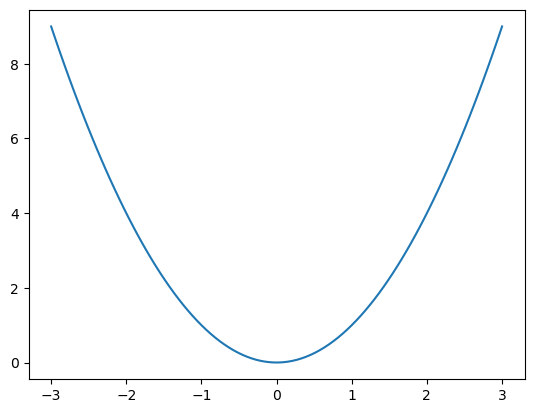

In [5]:
x = np.linspace(-3,3,100)
y=x**2
plt.plot(x,y);

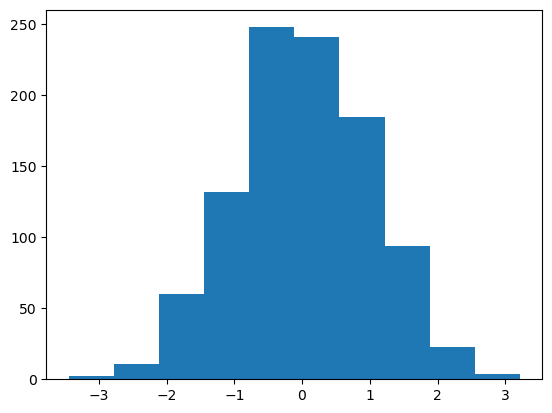

In [6]:
values = np.random.normal(size=1000)
plt.hist(values);

In [2]:
E:\Work-2025\Student-online-work-exp\array-oriented-programming\array-oriented-programming\data\SMHiggsToZZTo4L.json

SyntaxError: unexpected character after line continuation character (1829707106.py, line 1)

In [6]:
dataset = json.load(open("E:/Work-2025/Student-online-work-exp/array-oriented-programming/array-oriented-programming/data/SMHiggsToZZTo4L.json"))


In [7]:
type(dataset)
list
len(dataset)
dataset[0:3]

[{'run': 1,
  'luminosityBlock': 156,
  'event': 46501,
  'PV': {'x': 0.24369880557060242,
   'y': 0.3936990201473236,
   'z': 1.451307773590088},
  'electron': [],
  'muon': [{'pt': 63.04386901855469,
    'eta': -0.7186822295188904,
    'phi': 2.968005895614624,
    'mass': 0.10565836727619171,
    'charge': 1,
    'pfRelIso03_all': 0.0,
    'pfRelIso04_all': 0.0,
    'dxy': -0.004785160068422556,
    'dxyErr': 0.0060764215886592865,
    'dz': 0.09005985409021378,
    'dzErr': 0.044572051614522934},
   {'pt': 38.12034606933594,
    'eta': -0.8794569969177246,
    'phi': -1.0324749946594238,
    'mass': 0.10565836727619171,
    'charge': -1,
    'pfRelIso03_all': 0.0,
    'pfRelIso04_all': 0.0,
    'dxy': 0.0005746808601543307,
    'dxyErr': 0.0013040687190368772,
    'dz': -0.0032290113158524036,
    'dzErr': 0.003023269586265087},
   {'pt': 4.04868745803833,
    'eta': -0.320764422416687,
    'phi': 1.0385035276412964,
    'mass': 0.10565836727619171,
    'charge': 1,
    'pfRelIso03

In [8]:
#dataset = json.load(open("array-oriented-programming/data/SMHiggsToZZTo4L.json"))
dataset = json.load(open("E:/Work-2025/Student-online-work-exp/array-oriented-programming/array-oriented-programming/data/SMHiggsToZZTo4L.json"))
def to_vector(particle):
    return vector.obj(
        pt=particle["pt"],
        eta=particle["eta"],
        phi=particle["phi"],
        mass=particle["mass"],
    )

Let's make one collection of electrons and muons (collectively called "leptons") from one event as a list of Python dicts.

(In general, it would be better to use Python classes than Python dicts, since classes can be constrained with type annotations, but we won't be using classes or Python typing in any of the next Python lessons, so I won't introduce them here, either.)

In [ ]:
electrons_and_muons = []   # collectively known as "leptons"

event = dataset[96]   # a nice event with 3 electrons and 3 muons

for particle in event["electron"]:
    electrons_and_muons.append({
        "type": "electron",
        "charge": particle["charge"],
        "vector": to_vector(particle),
    })

for particle in event["muon"]:
    electrons_and_muons.append({
        "type": "muon",
        "charge": particle["charge"],
        "vector": to_vector(particle),
    })

Now, as a first draft ("step 0") of forming Z candidates, we'll make all non-repeating pairs of leptons (electrons and muons).

We'll use the `enumerate` function:

```python
list(enumerate(["a", "b", "c"])) == [(0, "a"), (1, "b"), (2, "c")]
```

and a nested for loop with `index_i < index_j` to ensure that if we include pair $(i, j)$, we don't also include $(j, i)$ (and also don't include $i = j$).

In [ ]:
z_candidates_step0 = []

for index_i, particle_i in enumerate(electrons_and_muons):
    for index_j, particle_j in enumerate(electrons_and_muons):
        if index_i < index_j:
            z_candidates_step0.append({
                "index": [index_i, index_j],
                "types": [particle_i["type"], particle_j["type"]],
                "charge": particle_i["charge"] + particle_j["charge"],
                "vector": particle_i["vector"] + particle_j["vector"],
            })

There are 15 lepton pairs in this event.

In [ ]:
len(z_candidates_step0)

Here's what they look like.

In [ ]:
z_candidates_step0

<br><br><br><br><br>

## Exercise part 1

Z bosons always decay into particles of opposite charge and identical flavor. Reduce the set of candidates by excluding ones with the wrong properties.

Replace the `if ...:` with an `if` statement that selects lepton pairs with the right properties.

In [ ]:
z_candidates_step1 = []

for candidate in z_candidates_step0:
    if ...:
        z_candidates_step1.append(candidate)

Of the original 15 lepton pairs, you should only have 4 left.

In [ ]:
for candidate in z_candidates_step1:
    print(candidate["types"], candidate["vector"].mass)

should look like

```
['electron', 'electron'] 94.65200565609612
['electron', 'electron'] 3.417050436103103
['muon', 'muon'] 26.450245222365524
['muon', 'muon'] 3.2737370390906744
```

<br><br><br><br><br>

## Exercise part 2

The Higgs boson decays into two Z bosons. The only constraint here is that a lepton from one Z decay can't also be a lepton from the other Z decay.

Replace the `if ...:` with an `if` statement that rejects double-counted indexes.

In [ ]:
higgs_candidates_step1 = []

for z_index1, z_candidate1 in enumerate(z_candidates_step1):
    for z_index2, z_candidate2 in enumerate(z_candidates_step1):
        if z_index1 < z_index2:
            lepton_i1, lepton_j1 = z_candidate1["index"]
            lepton_i2, lepton_j2 = z_candidate2["index"]
            if ...:
                higgs_candidates_step1.append({
                    "z_candidates": [z_candidate1, z_candidate2],
                    "vector": z_candidate1["vector"] + z_candidate2["vector"],
                })

There should be 4 Higgs candidates at this stage.

In [ ]:
for higgs_candidate in higgs_candidates_step1:
    z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
    lepton_index1, lepton_index2 = z_candidate1["index"]
    lepton_index3, lepton_index4 = z_candidate2["index"]
    print(
        lepton_index1,
        lepton_index2,
        lepton_index3,
        lepton_index4,
        higgs_candidate["vector"].mass,
    )

should look like

```
0 2 3 4 129.03461596915852
0 2 3 5 118.8311777089631
1 2 3 4 56.10989169721264
1 2 3 5 12.750734071856018
```

Even though each candidate avoids double-counting within itself, the same combination of four indexes can be found among the candidates. We want only one of each.

Let's collect these Higgs candidates by unique sets of indexes. The `sorted` function sorts a list, and `tuple` makes it possible to use them as keys in a dict.

In [ ]:
higgs_candidates_step2 = {}

for higgs_candidate in higgs_candidates_step1:
    z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
    lepton_index1, lepton_index2 = z_candidate1["index"]
    lepton_index3, lepton_index4 = z_candidate2["index"]

    combination = tuple(sorted([
        lepton_index1, lepton_index2, lepton_index3, lepton_index4
    ]))

    if combination not in higgs_candidates_step2:
        higgs_candidates_step2[combination] = []

    higgs_candidates_step2[combination].append(higgs_candidate)

This `higgs_candidates_step2` has deep structure:

  * Keys are sets combinations of lepton indexes, without regard for their original order.
  * Values are a list of decay trees.
    - Each element of that list has a candidate Higgs mass and two candidate Z masses.

In [ ]:
for combination in higgs_candidates_step2:
    print(combination)
    for higgs_candidate in higgs_candidates_step2[combination]:
        z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
        print(
            "    Higgs:",
            higgs_candidate["vector"].mass,
            "Z:",
            z_candidate1["vector"].mass,
            z_candidate2["vector"].mass,
        )

should look like

```
(0, 2, 3, 4)
    Higgs: 129.03461596915852 Z: 94.65200565609612 26.450245222365524
(0, 2, 3, 5)
    Higgs: 118.8311777089631 Z: 94.65200565609612 3.2737370390906744
(1, 2, 3, 4)
    Higgs: 56.10989169721264 Z: 3.417050436103103 26.450245222365524
(1, 2, 3, 5)
    Higgs: 12.750734071856018 Z: 3.417050436103103 3.2737370390906744
```

<br><br><br><br><br>

## Exercise part 3

One of the selections that the 2012 Higgs discovery analysis applied was:

  * 12 GeV/$c^2$ < smallest Z mass < 120 GeV/$c^2$
  * 40 GeV/$c^2$ < largest Z mass < 120 GeV/$c^2$

because this is expected of real Higgs decays.

Apply the Z mass constraint to these Higgs candidates. (You may want to replace more than the `...` expressions.)

In [ ]:
higgs_candidates_step3 = {}

for combination in higgs_candidates_step2:
    higgs_candidates_step3[combination] = []

    for higgs_candidate in higgs_candidates_step2[combination]:
        z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
        smallest_z_mass = ...
        largest_z_mass = ...

        if 12 < smallest_z_mass < 120 and 40 < largest_z_mass < 120:
            higgs_candidates_step3[combination].append(higgs_candidate)

In the end,

In [ ]:
for combination in higgs_candidates_step3:
    print(combination)
    for higgs_candidate in higgs_candidates_step3[combination]:
        z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
        print(
            "    Higgs:",
            higgs_candidate["vector"].mass,
            "Z:",
            z_candidate1["vector"].mass,
            z_candidate2["vector"].mass,
        )

should be

```
(0, 2, 3, 4)
    Higgs: 129.03461596915852 Z: 94.65200565609612 26.450245222365524
(0, 2, 3, 5)
(1, 2, 3, 4)
(1, 2, 3, 5)
```

Only one of the combinations has a satisfactory Higgs candidate.

Its mass is about right, too (125 GeV).

<br><br><br>

This aspect of particle physics—the fact that observed particles can be associated with a decay tree in multiple ways—is known as "combinatorics."

<br>

Complex, nested data structures and combinatorics are essential aspects of particle physics analysis.